## PCA 

In [ ]:
#import library
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [18]:
df = pd.read_csv('../../Data/f_churn.csv')

In [19]:
df.head()

,Unnamed: 0,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender
0,0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1
1,1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1
2,2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1
3,3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1
4,4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1


In [20]:
X=df.drop(['Unnamed: 0','Exited'],axis=1)
y=df['Exited']

In [21]:
# vis to 2D
pca=PCA(n_components=2)

In [22]:
X2=pca.fit_transform(X)

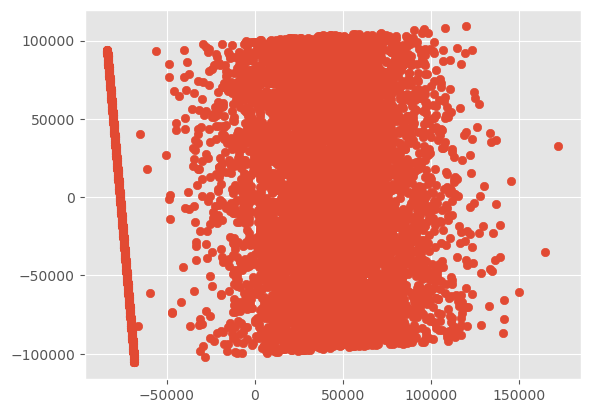

In [23]:
plt.style.use('ggplot')
plt.scatter(X2[:,0],X2[:,1])

In [24]:
pca.components_

array([[ 9.51816562e-06,  4.65281356e-06, -5.39944291e-07,
         9.96979873e-01, -2.81486667e-06, -1.13309082e-07,
        -8.69970340e-08,  7.76603729e-02, -1.84837476e-06,
         2.78116284e-06, -9.32788075e-07, -9.14419302e-08],
       [ 3.21058039e-06,  1.74611085e-06, -4.42665725e-07,
         7.76603728e-02, -4.02880589e-07,  6.86475509e-08,
         9.16735326e-08, -9.96979873e-01, -1.40742539e-07,
         1.77587451e-07, -3.68449116e-08, -7.89282313e-08]])

In [25]:
pca.explained_variance_ratio_

array([0.54118404, 0.45881465])

In [26]:
np.cumsum(pca.explained_variance_ratio_)

array([0.54118404, 0.99999869])

In [27]:
# PCA for all fitures
X.shape

(10000, 12)

In [28]:
pca=PCA(n_components=12)

In [29]:
X_all=pca.fit_transform(X)

In [30]:
pca.explained_variance_ratio_

array([5.41184038e-01, 4.58814649e-01, 1.29726452e-06, 1.52621559e-08,
       1.16130599e-09, 5.08294413e-11, 4.28673442e-11, 3.54226235e-11,
       3.34655522e-11, 2.94289634e-11, 2.82621559e-11, 7.39967289e-42])

In [31]:
cumsum=np.cumsum(pca.explained_variance_ratio_)

In [32]:
d=np.argmax(cumsum>=0.95)+1
print(d)

2


In [43]:
# Random Forest model on all fiture 
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , train_size=0.8)
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [44]:
y_pred = rf.predict(X_test)

In [45]:
accuracy_score(y_pred , y_test)

0.855

In [46]:
#Random Forest model on pca fiture
X_train , X_test , y_train , y_test = train_test_split(X2,y , test_size=0.2 , train_size= 0.8)
rf = RandomForestClassifier()
rf.fit(X_train , y_train)

RandomForestClassifier()

In [47]:
y_pred = rf.predict(X_test)

In [48]:
accuracy_score(y_pred , y_test)

0.7255